In [220]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(parent_dir)

from functions.read_g4bl_data import readTraceData

In [221]:
# Solenoid parameters:
L = 300 # mm
a = 360 # mm
b = 500 # mm
J = 80.46 # A/mm^2
pitch = 0 # degrees

# Channel parameters:
n = 6
spacing = 700

# Constants:
mu0 = 1.2e-3 # kg*mm/s^2/A^2

# Define function to plot lines indicating solenoid placement:
def plot_solenoid(ax):
    for i in range(n):
        ax.axvspan(xmin=-L/2+i*spacing, xmax=L/2+i*spacing, color='gray', alpha=0.1, zorder=-1)

## Without solenoid pitches

### Particle tracking

In [222]:
# Read-in data:
data = readTraceData('ReferenceParticle_NoPitch.txt')

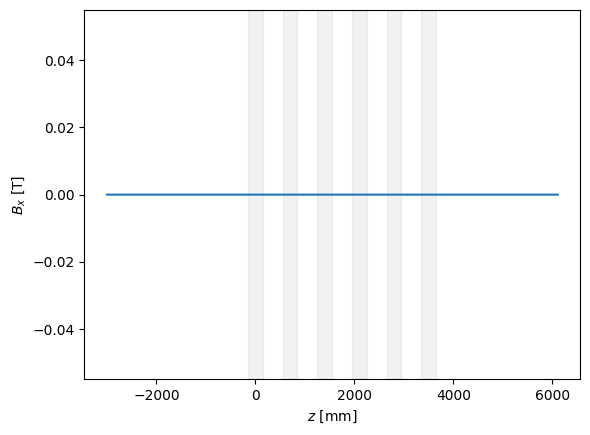

In [223]:
# Plot B_x vs. z:
fig, ax = plt.subplots()
plt.plot(data['z'], data['Bx'])
plot_solenoid(ax)
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_x$ [T]')
plt.show()

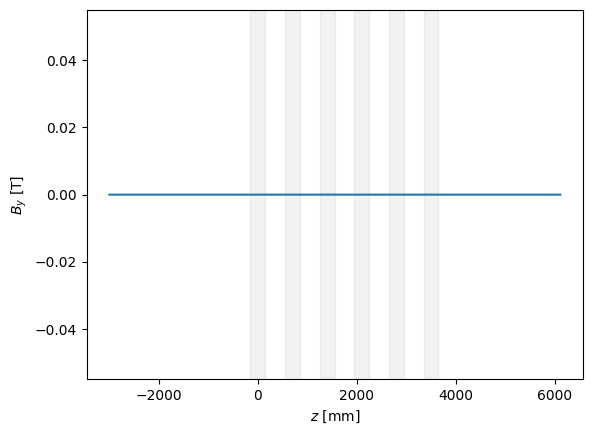

In [224]:
# Plot B_y vs. z:
fig, ax = plt.subplots()
plt.plot(data['z'], data['By'])
plot_solenoid(ax)
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_y$ [T]')
plt.show()

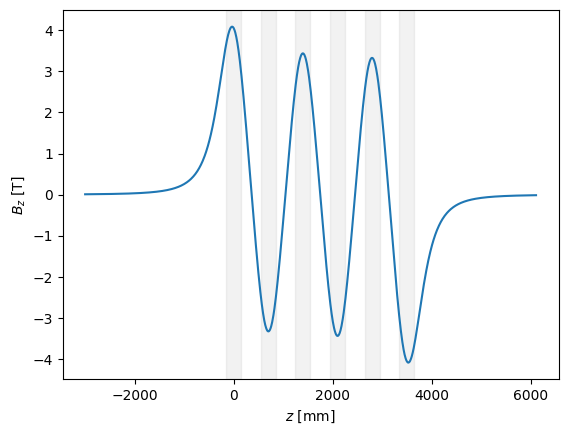

In [225]:
# Plot B_z vs. z:
fig, ax = plt.subplots()
plt.plot(data['z'], data['Bz'])
plot_solenoid(ax)
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_z$ [T]')
plt.show()

### Analytical approach

In [226]:
# Analytical formula for B field from Fernow paper:
def B(z, J):
    ''' Note that z is defined as the axial distance from center of the solenoid '''
    B = mu0*J/2 * ( (L-z) * math.log( ( b + np.sqrt( b**2 + (L-z)**2 ) ) / ( a + np.sqrt( a**2 + (L-z)**2 ) ) ) + (L+z) * math.log( ( b + np.sqrt( b**2 + (L+z)**2 ) ) / ( a + np.sqrt( a**2 + (L+z)**2)) ) )
    return B

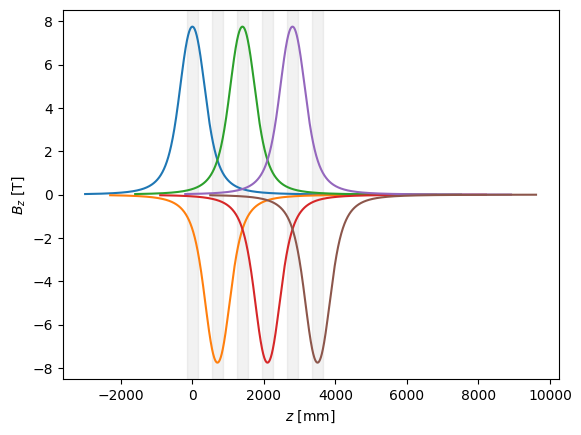

In [227]:
fig, ax = plt.subplots()

# Loop over solenoids:
df = pd.DataFrame({'z':pd.Series(dtype='float'), 'Bx':pd.Series(dtype='float'), 'By':pd.Series(dtype='float'), 'Bz':pd.Series(dtype='float')})
for i in range(n):

    # Field at one solenoid:
    z_vals, Bx_vals, By_vals, Bz_vals = [], [], [], []
    for j in range(len(data['z'])):
        if i%2 == 0: # positive polarity
            z = data['z'][j]
            z_vals.append(z+i*spacing)
            Bx_vals.append(0)
            By = -B(z, J)*np.sin(pitch*math.pi/180)
            By_vals.append(By)
            Bz = B(z, J)*np.cos(pitch*math.pi/180)
            Bz_vals.append(Bz)
        elif i%2 == 1: # negative polarity
            z = data['z'][j]
            z_vals.append(z+i*spacing)
            Bx_vals.append(0)
            By = -B(z, -J)*np.sin(pitch*math.pi/180)
            By_vals.append(By)
            Bz = B(z, -J)*np.cos(pitch*math.pi/180)
            Bz_vals.append(Bz)
    df_temp = pd.DataFrame({'z' : z_vals, 'Bx' : Bx_vals, 'By' : By_vals, 'Bz' : Bz_vals})

    # Add to DataFrame with field components from all solenoids:
    df = pd.concat([df, df_temp], ignore_index=True)

    # Plot B_z vs. z for each solenoid:
    plt.plot(df_temp['z'], df_temp['Bz'])

plot_solenoid(ax)
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_z$ [T]')
plt.show()
    
# Sum all field components:
summed_df = df.groupby('z', as_index=False).sum()


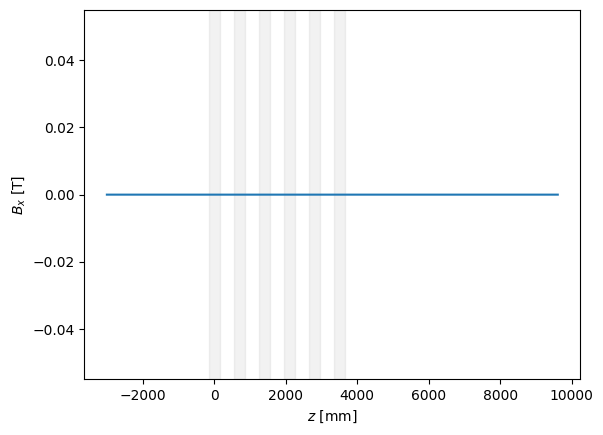

In [228]:
# Plot B_x vs. z:
fig, ax = plt.subplots()
plt.plot(summed_df['z'], summed_df['Bx'])
plot_solenoid(ax)
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_x$ [T]')
plt.show()

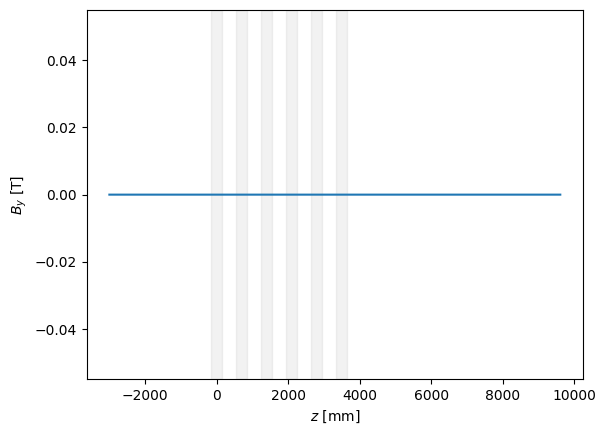

In [229]:
# Plot B_y vs. z:
fig, ax = plt.subplots()
plt.plot(summed_df['z'], summed_df['By'])
plot_solenoid(ax)
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_y$ [T]')
plt.show()

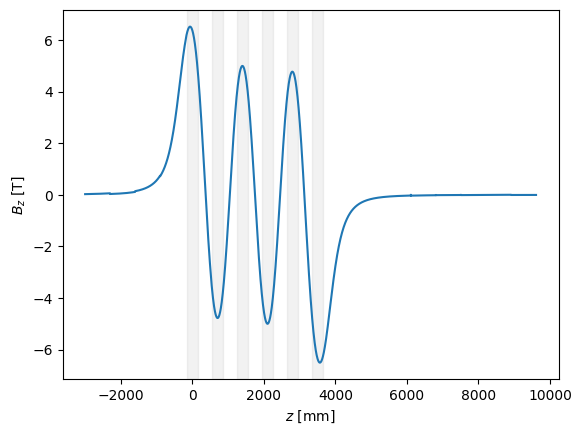

In [230]:
# Plot B_z vs. z:
fig, ax = plt.subplots()
plt.plot(summed_df['z'], summed_df['Bz'])
plot_solenoid(ax)
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_z$ [T]')
plt.show()

### Comparison

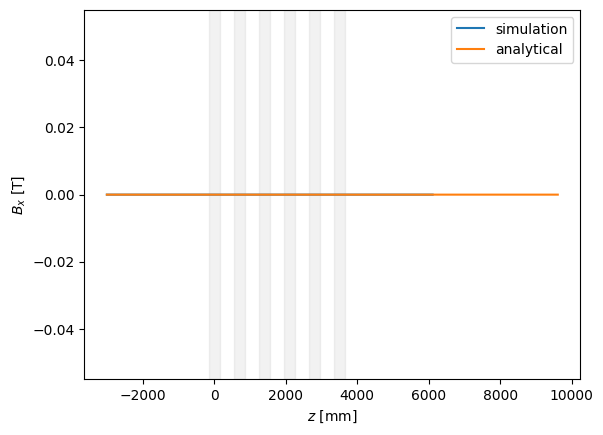

In [231]:
# Plot B_x vs. z:
fig, ax = plt.subplots()
plt.plot(data['z'], data['Bx'], label='simulation')
plt.plot(summed_df['z'], summed_df['Bx'], label='analytical')
plot_solenoid(ax)
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_x$ [T]')
plt.legend()
plt.show()

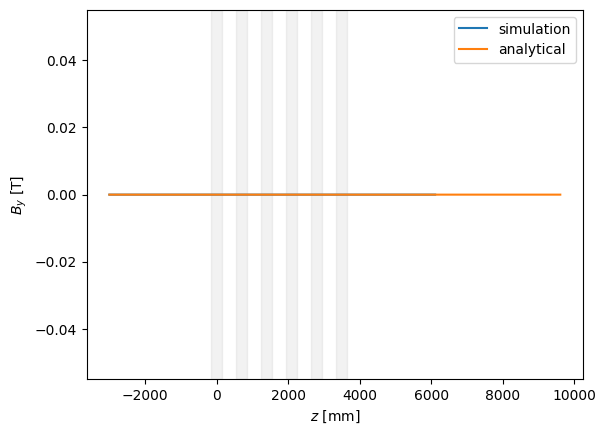

In [232]:
# Plot B_y vs. z:
fig, ax = plt.subplots()
plt.plot(data['z'], data['By'], label='simulation')
plt.plot(summed_df['z'], summed_df['By'], label='analytical')
plot_solenoid(ax)
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_y$ [T]')
plt.legend()
plt.show()

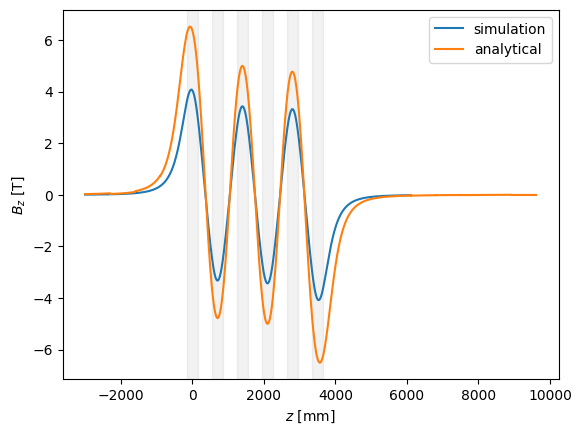

In [233]:
# Plot B_z vs. z:
fig, ax = plt.subplots()
plt.plot(data['z'], data['Bz'], label='simulation')
plt.plot(summed_df['z'], summed_df['Bz'], label='analytical')
plot_solenoid(ax)
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_z$ [T]')
plt.legend(loc='upper right')
plt.show()